In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('aal.csv', index_col=['Date'], parse_dates=['Date'])
data.head(10)

Open    High     Low   Close    Volume  OpenInt
Date                                                         
2013-12-10  23.698  24.345  23.610  24.064  18043837        0
2013-12-11  24.607  26.288  24.539  25.139  43224764        0
2013-12-12  25.342  25.832  24.616  24.616  20749989        0
2013-12-13  24.771  25.437  24.684  25.369  12588700        0
2013-12-16  25.749  25.888  25.485  25.739  17136729        0
2013-12-17  25.605  25.721  25.099  25.245  11260767        0
2013-12-18  25.139  25.369  24.714  25.369  12074578        0
2013-12-19  25.237  25.624  24.975  25.265   6863328        0
2013-12-20  25.304  25.624  25.288  25.466  12105293        0
2013-12-23  25.495  25.624  25.199  25.324   7888164        0

In [2]:
drop_cols = ['Volume', 'OpenInt']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

Open    High     Low   Close
Date                                      
2013-12-10  23.698  24.345  23.610  24.064
2013-12-11  24.607  26.288  24.539  25.139
2013-12-12  25.342  25.832  24.616  24.616
2013-12-13  24.771  25.437  24.684  25.369
2013-12-16  25.749  25.888  25.485  25.739

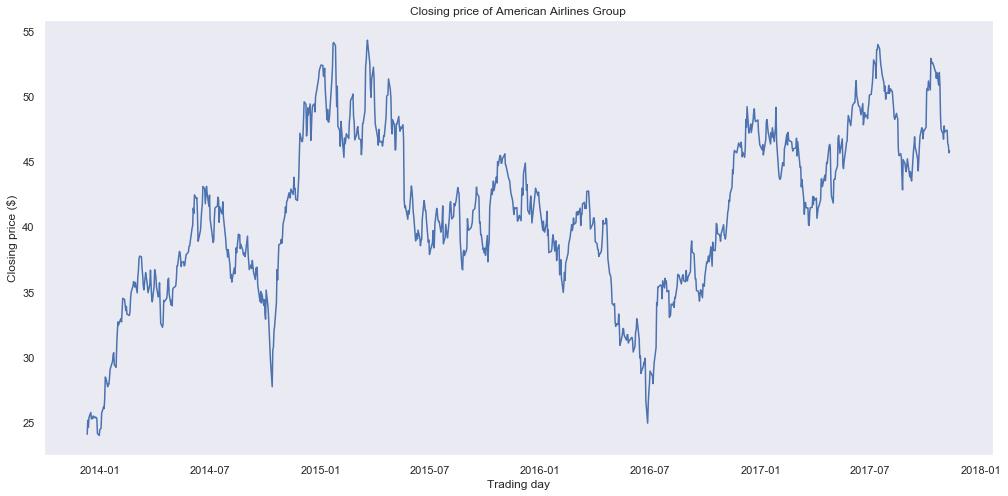

In [3]:
plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of American Airlines Group')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

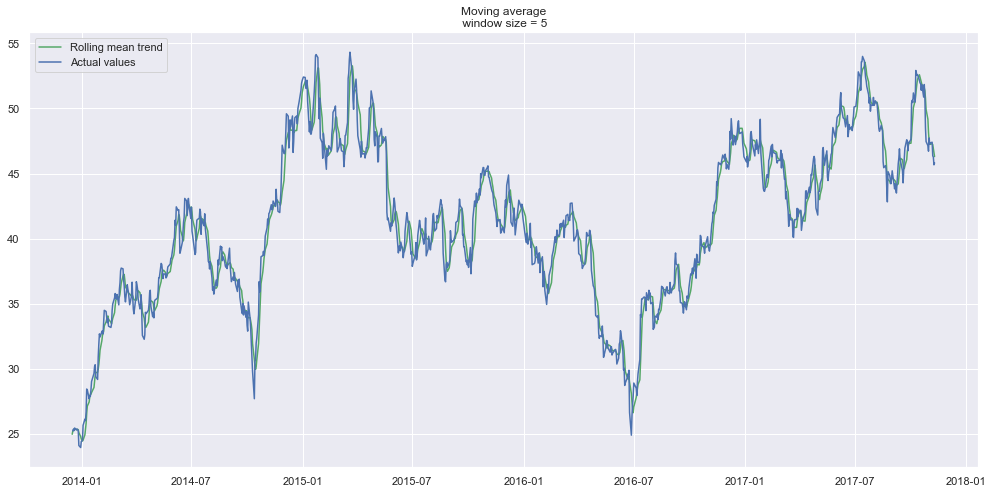

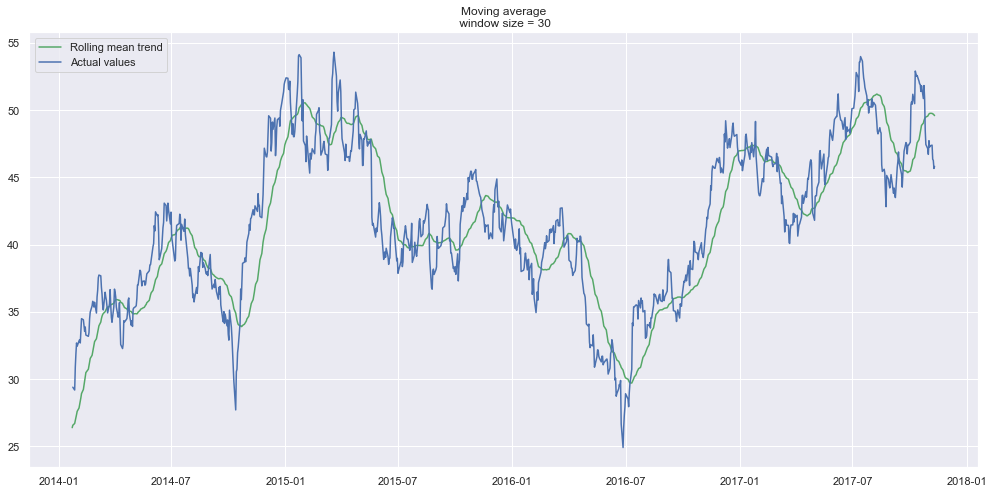

In [4]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)
#plot_moving_average(data.Close, 90, plot_intervals=True)

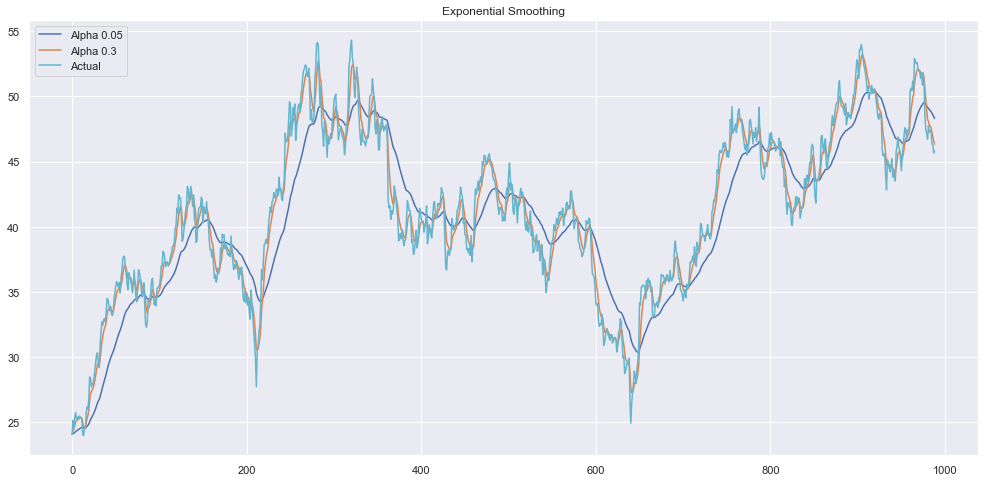

In [5]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(data.Close, [0.05, 0.3])

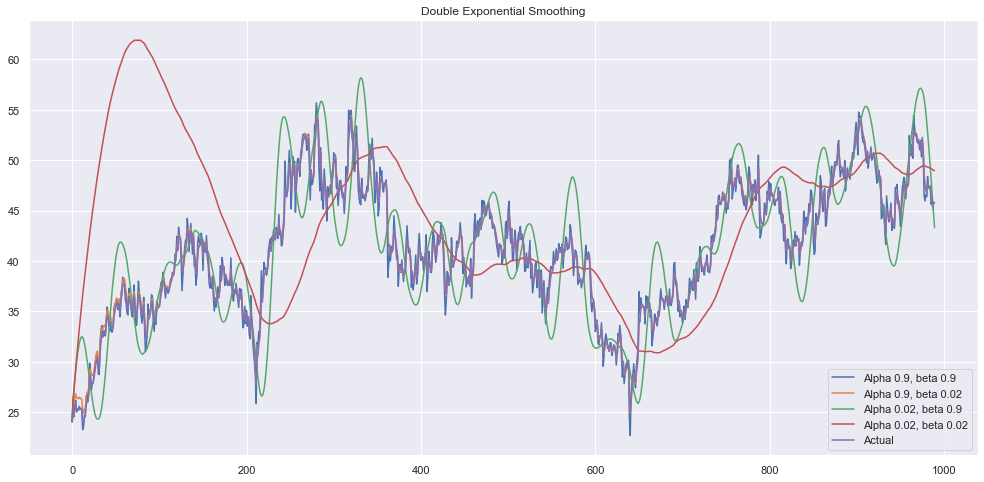

In [6]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

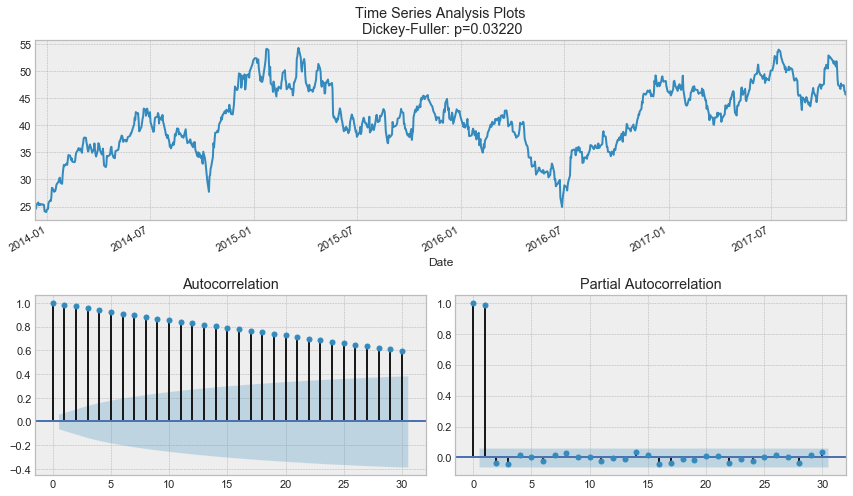

In [7]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

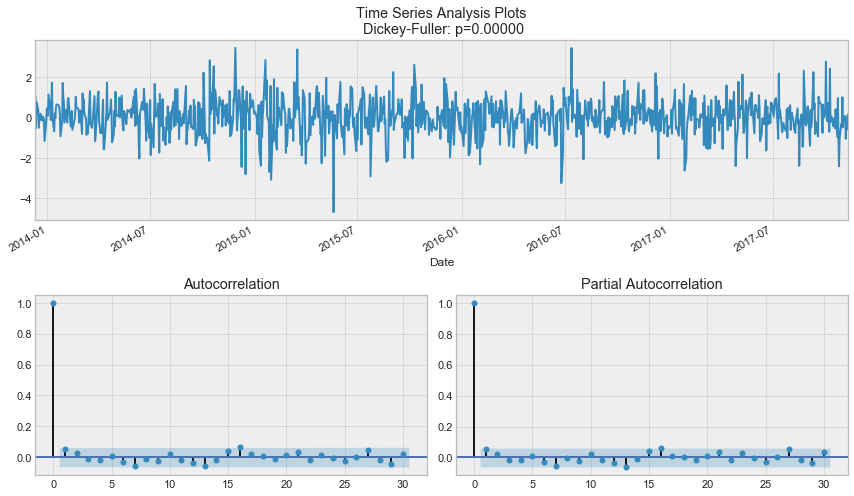

In [8]:
# Take the first difference to remove to make the process stationary
data_diff = data.Close - data.Close.shift(1)

tsplot(data_diff[1:], lags=30)

In [9]:
import pandas as pd
aal = pd.read_csv('aal.csv', parse_dates=[0])

In [10]:
aal.head()

Date    Open    High     Low   Close    Volume  OpenInt
0 2013-12-10  23.698  24.345  23.610  24.064  18043837        0
1 2013-12-11  24.607  26.288  24.539  25.139  43224764        0
2 2013-12-12  25.342  25.832  24.616  24.616  20749989        0
3 2013-12-13  24.771  25.437  24.684  25.369  12588700        0
4 2013-12-16  25.749  25.888  25.485  25.739  17136729        0

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [12]:
aal.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [13]:
 # Shift CLose down to predict next day
pd.concat([aal.Close, aal.Close.shift(-1)], axis=1)

Close   Close
0    24.064  25.139
1    25.139  24.616
2    24.616  25.369
3    25.369  25.739
4    25.739  25.245
..      ...     ...
984  47.406  46.358
985  46.358  46.269
986  46.269  45.670
987  45.670  45.820
988  45.820     NaN

[989 rows x 2 columns]

In [14]:
aal.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [15]:
# Need to remove NA
# Regression - Try to predict Close (y) from non Close columns (X)
# Get training set (X_train)
def valid(col):
    return 'Close' not in col and 'Date' not in col and col != 'OpenInt'
aal = aal.dropna()
X = aal[[x for x in aal.columns if valid(x)]].iloc[:-5]
y = aal.Close.shift(-5).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
X.T

0             1             2             3             4    \
Open    2.369800e+01  2.460700e+01  2.534200e+01  2.477100e+01  2.574900e+01   
High    2.434500e+01  2.628800e+01  2.583200e+01  2.543700e+01  2.588800e+01   
Low     2.361000e+01  2.453900e+01  2.461600e+01  2.468400e+01  2.548500e+01   
Volume  1.804384e+07  4.322476e+07  2.074999e+07  1.258870e+07  1.713673e+07   

                 5             6            7             8            9    \
Open    2.560500e+01  2.513900e+01       25.237  2.530400e+01       25.495   
High    2.572100e+01  2.536900e+01       25.624  2.562400e+01       25.624   
Low     2.509900e+01  2.471400e+01       24.975  2.528800e+01       25.199   
Volume  1.126077e+07  1.207458e+07  6863328.000  1.210529e+07  7888164.000   

        ...          974          975          976           977          978  \
Open    ...       51.807       50.909       51.667  5.188600e+01       48.304   
High    ...       51.836       51.986       51.667  5.307400e+01       48.783   
Low     ...       50.759       50.440       50.499  4.821400e+01       47.227   
Volume  ...  3456220.000  3654538.000  4661368.000  1.210254e+07  8609865.000   

                979          980          981          982          983  
Open         47.546       47.117       47.895       47.686       47.257  
High         47.566       47.496       48.095       47.824       47.506  
Low          46.728       46.688       47.267       46.987       46.698  
Volume  5414359.000  4606669.000  4364056.000  2415938.000  4046023.000  

[4 rows x 984 columns]

In [17]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.8688456743175845

In [19]:
type(y_test)

pandas.core.series.Series

In [20]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

0   Close
0    31.5347  31.710
1    40.1962  37.794
2    39.3935  41.938
3    40.7375  41.239
4    49.7754  54.041
..       ...     ...
241  34.6697  36.997
242  36.9179  34.096
243  34.4573  31.012
244  41.8061  40.111
245  32.7818  28.733

[246 rows x 2 columns]

In [46]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('High', 0.5974438081465988),
 ('Low', 0.3343889937479613),
 ('Open', 0.03694738964576788),
 ('Volume', 0.031219808459672135)]